In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset3 = np.genfromtxt(r"datasets\2_music.txt",delimiter=',')
X_dataset3 = dataset3[:,0:68] 
Y_dataset3 = dataset3[:,68:70]
x_train = X_dataset3[:math.floor(0.7*len(X_dataset3))]
y_train = Y_dataset3[:math.floor(0.7*len(X_dataset3))]
degree = len(X_dataset3[0])

In [3]:
def gaussian_Basis(x_train,mean,sigma_square,k):
    Phi = np.zeros((len(x_train),k))
    for i in range(len(x_train)):
        for j in range(k):
            for l in range(degree):
                Phi[i][j] += (x_train[i][l]-mean[j][l])**2
    return math.e**(Phi*(-1)/sigma_square)

In [4]:
def generatePhi_tilde(mean,sigma_square,k,degree):    
    Phi_tilde = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            for l in range(degree):
                Phi_tilde[i][j] += (mean[i][l]-mean[j][l])**2
    return math.e**(Phi_tilde*(-1)/sigma_square)

In [5]:
def erms_error_gaussian(x_train,y_train,lamda,mean,sigma_square,thikonov,k,degree):
    Phi = gaussian_Basis(x_train,mean,sigma_square,k)
    I = np.identity(k)
    if thikonov:
        I = generatePhi_tilde(mean,sigma_square,k,degree)
    w = np.linalg.inv(Phi.transpose().dot(Phi)+lamda*I).dot(Phi.transpose().dot(y_train))

    predicted = gaussian_Basis(X_dataset3,mean,sigma_square,k).dot(w)
    plt.scatter(Y_dataset3[:,0], predicted[:,0])
    plt.show()
    plt.scatter(Y_dataset3[:,1], predicted[:,1])
    plt.show()
    error = 0
    for i in range(len(Y_dataset3)):
        error += (predicted[i]-Y_dataset3[i])**2

    error /= len(Y_dataset3)
    return math.sqrt(sum(error))

In [6]:
def Euclidean_distance(data1,data2):
    return math.sqrt(sum((data1-data2)**2))

In [7]:
def assignCluster(mean,data,k):
    z = np.zeros((len(data),k))
    for i in range(len(data)):
        closest = Euclidean_distance(data[i],mean[0])**2
        z[i][0] = 1
        for j in range(len(mean)):
            dist = Euclidean_distance(data[i],mean[j])**2
            if(dist < closest):
                closest = dist
                z[i] = np.zeros(k)
                z[i][j] = 1
    return z

In [8]:
def updateMean(z,data,k):
    mean = np.zeros((k,degree))
    N = sum(z)
    for i in range(k):
        for j in range(len(data)):
            mean[i]+=data[j]*z[j][i]
        mean[i]/=N[i]
    return mean

In [9]:
def KmeansClustering(k,data,iteration):
    mean = np.zeros((k,degree))
    mean_index_initial = np.random.choice(len(data),k)
    mean = data[mean_index_initial]
    z_old = assignCluster(mean,data,k)
    for i in range(iteration):
        mean = updateMean(z_old,data,k)
        z_new = assignCluster(mean,data,k)
        if np.allclose(z_new,z_old):
            return mean
        z_old = z_new
    return mean

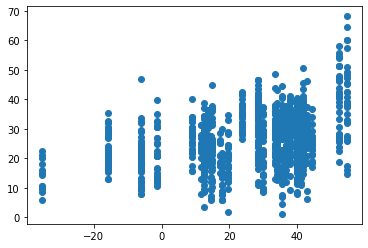

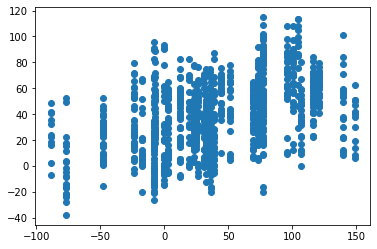

48.89611990285523


In [10]:
sigma_square = 100
k = 25
iteration = 100
mean = KmeansClustering(k,X_dataset3,iteration)
lamda = math.e**(-18)
error = erms_error_gaussian(x_train,y_train,lamda,mean,sigma_square,True,k,degree)
print(error)